In [117]:
import numpy as np
from matplotlib import pyplot as plt
import random

The static betting strategy is the most simple: bet the same amount of money until you hit the goal or until you bust out and lose everything.

In [118]:
def static(budget: int, bet: int):
    flip = random.randint(0,1)  #0: Heads, 1: Tails
    return [budget - 1] if flip else [budget + 1]

The martingale strategy involves starting with an initial bet size. You double the bet with every loss, and reset to the original bet size with every win. This way, every win recoups the money lost from the previous consecutive losses, plus a bit of profit.

If the gambler's balance is positive but insufficient for another doubling of the bet size, the bet size is reset to the original sizing. This way, the gambler keeps gambling until his balance reaches 0 or until it reaches the goal.

The first visualization of this strategy displays the gambler's balance after every coin flip, win or lose. 

In [119]:
def martingale(budget: int, original_bet: int):
    bet = original_bet
    history = []
    while budget >= bet:
        flip = random.randint(0,1)
        if flip == 0:   #Heads
            return history + [budget + bet]
        else:   #Tails
            budget -= bet
            bet *= 2
        history.append(budget)
    return history

The second visualization of this strategy displays the gambler's balance after every coin flip win. This results in a much smoother graph.

In [120]:
def martingale_alt(budget: int, original_bet: int):
    bet = original_bet
    while budget >= bet:
        flip = random.randint(0,1)
        if flip == 0:   #Heads
            return [budget + bet]
        else:   #Tails
            budget -= bet
            bet *= 2
    return [budget]

In [121]:
def simulate_strategy(budget: int, original_bet: int, goal: int, strategy):
    history = [budget]

    while budget > 0 and budget < goal:
        history += strategy(budget, original_bet)
        budget = history[-1]
    return history

Note that the two martingale visualizations don't represent the same set of data.

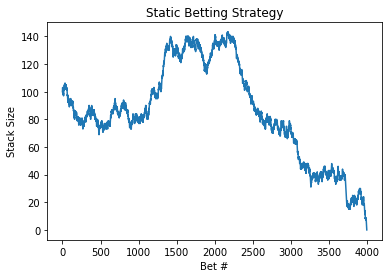

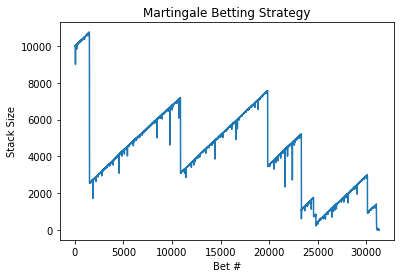

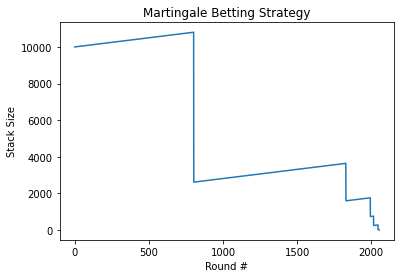

In [123]:
plt.title("Static Betting Strategy")
plt.xlabel("Bet #")
plt.ylabel("Stack Size")
res = simulate_strategy(100, 1, 200, static)
x = [i for i in range(len(res))]
plt.plot(x,res)
plt.show()

plt.title("Martingale Betting Strategy")
plt.xlabel("Bet #")
plt.ylabel("Stack Size")
res = simulate_strategy(10000, 1, 20000, martingale)
x = [i for i in range(len(res))]
plt.plot(x, res)
plt.show()

plt.title("Martingale Betting Strategy")
plt.xlabel("Round #")
plt.ylabel("Stack Size")
res = simulate_strategy(10000, 1, 20000, martingale_alt)
x = [i for i in range(len(res))]
plt.plot(x, res)
plt.show()

According to the optional stopping theorem, given the gambler's starting stack (s) and the gambler's goal (g), the probability that the gambler's balance reaches g before bankruptcy is equal to s/g given that the bet size is 1 and s and g are whole numbers. Here, I confirm that this property holds true for the static and martingale betting strategies.

For the sake of simplicity, I'll assume the gambler stops at bankruptcy and not when his balance falls below a certain threshold.

In [140]:
def get_proportion(s: int, g: int, n: int, strategy):
    wins = losses = 0
    orig_s = s

    for _ in range(n):
        s = orig_s
        while s > 0 and s < g:
            s = strategy(s, 1)[0]   #bet size is 1 for simplicity
        
        if s == 0:
            losses += 1
        else:
            wins += 1
    
    p = wins / (wins + losses)  #proportions of wins
    s = (p*(1-p)/n) ** 0.5      #standard deviation of a bionmial RV
    return p, [round(p - 1.96*s, 4), round(p + 1.96*s, 4)]  #95% confidence interval of the theoretical proportion of wins

In [146]:
s, g = 65, 100
proportion, interval = get_proportion(s, g, 1000, static)
print("Printing results for the static strategy:")
print("-------------------------------------------")
print("Theoretical proportion of wins: " + str(s/g))
print("Empirical proportion of wins: " + str(proportion))
print("95 percent confidence interval of proportion: " + str(interval))

Printing results for the static strategy:
-------------------------------------------
Theoretical proportion of wins: 0.65
Empirical proportion of wins: 0.654
95 percent confidence interval of proportion: [0.6245, 0.6835]


In [147]:
s, g = 3900, 5000
proportion, interval = get_proportion(s, g, 1000, martingale_alt)
print("Printing results for the martingale strategy:")
print("-------------------------------------------")
print("Theoretical proportion of wins: " + str(s/g))
print("Empirical proportion of wins: " + str(proportion))
print("95 percent confidence interval of proportion: " + str(interval))

Printing results for the martingale strategy:
-------------------------------------------
Theoretical proportion of wins: 0.78
Empirical proportion of wins: 0.782
95 percent confidence interval of proportion: [0.7564, 0.8076]


This matches up well with what was predicted.